# 1 Визуальный анализ данных #

***Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)***

***Сохраните результат. Загрузите на сайт и отчитайтесь по заданию***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
import kaggle

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

В данном датасете целевым является признак count - количество арендованных велосипедов

In [54]:
##загрузите с помощью pandas файл train.csv из предложенного датасета
data = pd.read_csv(r'C:\Users\alexe\Desktop\Технологии программирования\train.csv')
data.head()
## выведите первые пять строчек

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
# выведите информацию о датасете
data.info()
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Первый столбец в датасете datatime содержит дату и время. В таблице будет несколько строк соответствующих одному и тому же дню, но с разным временем.

Нужно сделать таким образом, чтобы для каждого дня была одна строка, время можно удалить. Продумайте что нужно сделать с остальными полями:
- season        
- holiday       
- workingday    
- weather       
- temp          
- atemp         
- humidity      
- windspeed     
- casual        
- registered    
- count         

In [56]:
## код
data['datetime'] = pd.to_datetime(data['datetime']).dt.date #удалили время из даты
data.head()
##

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [57]:
data = data.drop_duplicates('datetime')
data['datetime'].is_unique

True

Преобразуйте датасет еще немного:

из столбца datatime сделайте два столбца: month year

In [66]:
## код
data['month'] = pd.to_datetime(data['datetime']).dt.month
data['year'] = pd.to_datetime(data['datetime']).dt.year
data = data.drop('datetime', 1) #0 - для строк, 1 - для столбцов
data.head()
##

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011
24,1,0,0,2,18.86,22.725,88,19.9995,4,13,17,1,2011
47,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,1,2011
69,1,0,1,1,6.56,9.090,55,7.0015,0,5,5,1,2011
92,1,0,1,1,8.20,12.880,64,0.0000,0,6,6,1,2011


In [92]:
# Постройте графики зависимостей целевого признака count
# от каждого из нецелевых
# Должно получиться 12 графиков, используйте subplot
# 

def draw_gr(data1, data2, x_label="", y_label="", color = "r"):
    _, ax = plt.subplots()
    ax.scatter(data1, data2, s=10, alpha=0.5)
    ax.set_title(x_label + ' vs ' + y_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

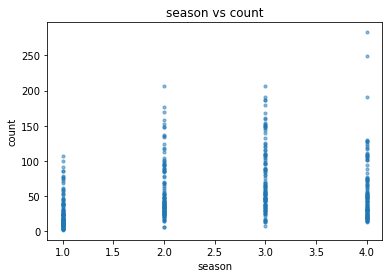

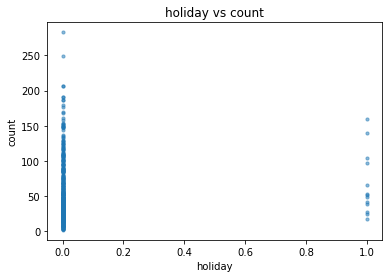

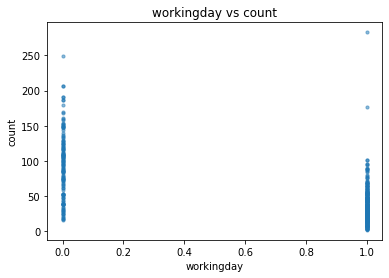

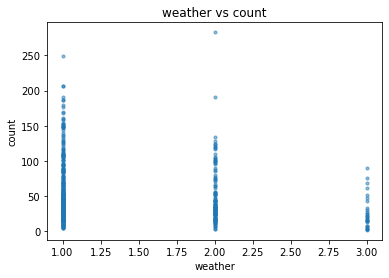

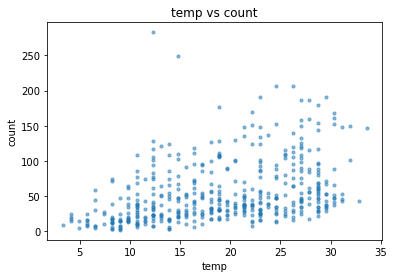

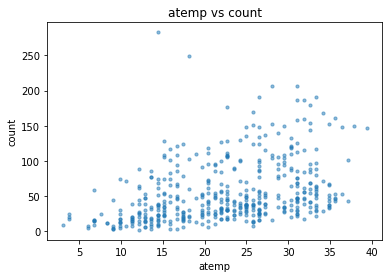

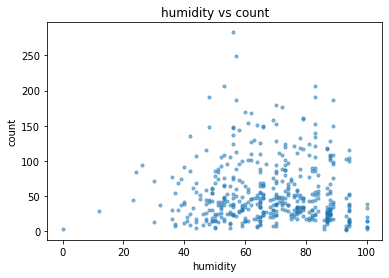

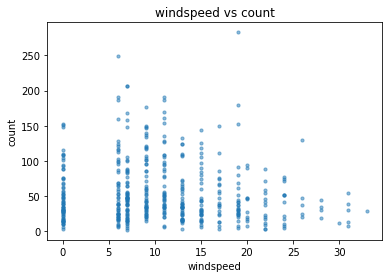

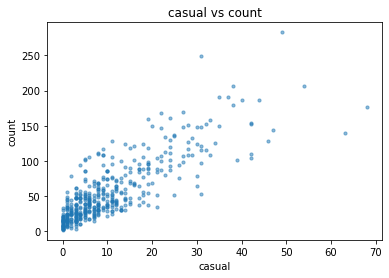

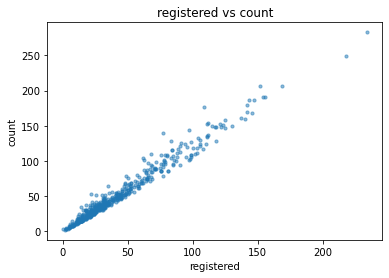

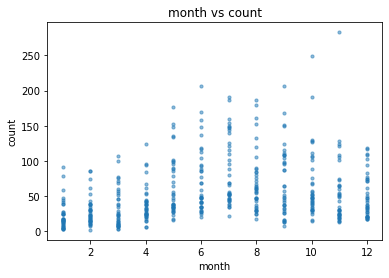

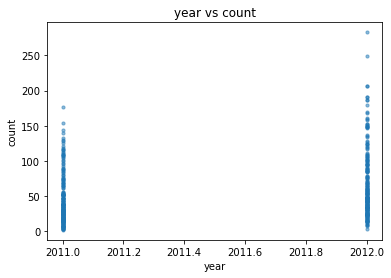

In [93]:
names_col = list(data.columns)
names_col.remove('count')

for name in names_col:
    draw_gr(data[name], data['count'], name, 'count')

**1. Ответьте на вопросы:**

Каков характер зависимости числа прокатов от месяца?

Укажите один или два признака, от которых число прокатов скорее всего зависит линейно


In [ ]:
#ответ 1 Нелинейная зависимость? Наибольшее число прокатов наблюдается в период май-сентябрь
#ответ 2 Casual, Registered

Text(0.5, 1.0, 'registered vs cout')

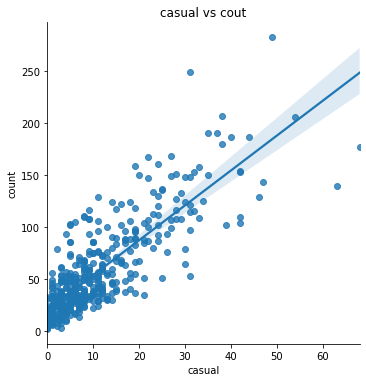

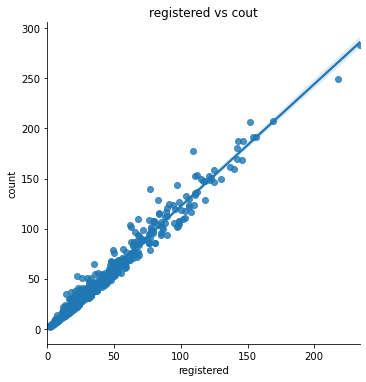

In [98]:
# Проверьте ответы на предыдущие вопросы с помощью lmplot
#
sns.lmplot(x='casual', y='count', data=data)
plt.title('casual vs cout')

sns.lmplot(x='registered', y='count', data=data)
plt.title('registered vs cout')

**2. Корреляционная матрица**

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная величина корреляции, тем взаимосвязь больше.


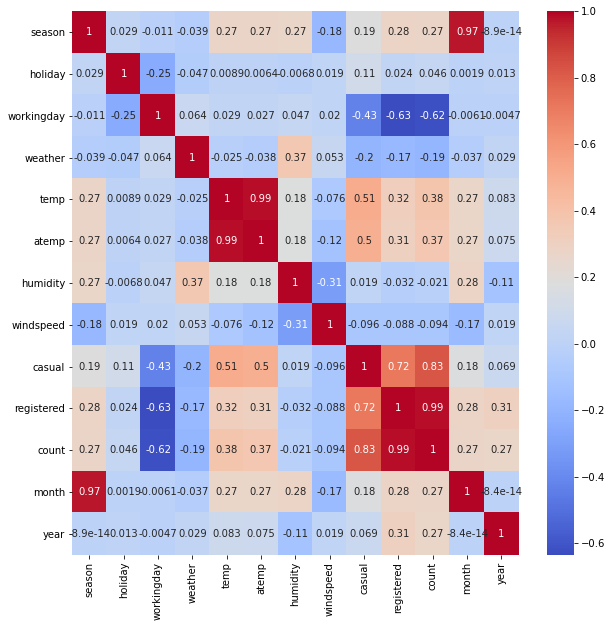

In [109]:
#Постройте heatmap корреляционной матрицы. 
#Матрица формируется средствами pandas, 
#со стандартным значением параметров.
#
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

`Ответьте на вопросы:` с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). 

А с какими больше всего?

In [ ]:
#ответ 
# Меньше всего - windspeed, humidity, holiday

In [ ]:
# Ответ
# Больше всего - registered, casual, workingday

**3. Barplot**

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

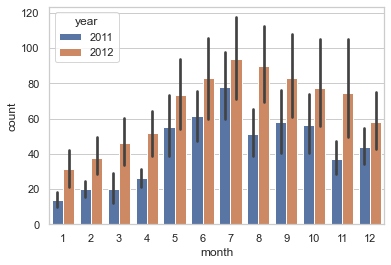

In [110]:
# напишите код для посторения bar графика
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="month", y="count", hue="year", data=data)

`Ответьте на вопрос:` почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?
???

**4. Countplot**

Постройте countplot диаграммы для признаков `holiday`, `workingday`, `weather`

C:\Users\alexe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

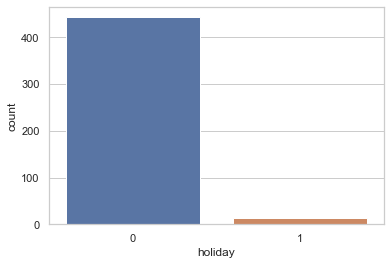

In [116]:
# напишите код для посторения Countplot графиков
sns.countplot(data['holiday'])

C:\Users\alexe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

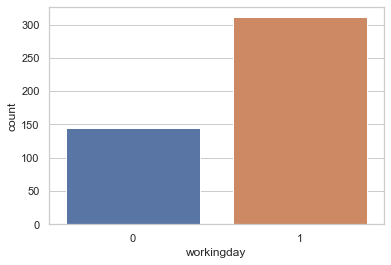

In [117]:
sns.countplot(data['workingday'])

C:\Users\alexe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

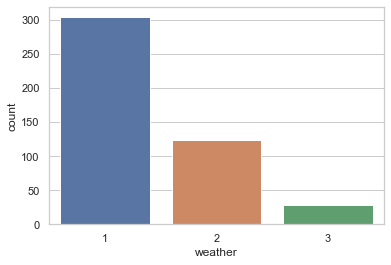

In [118]:
sns.countplot(data['weather'])

`Ответьте на вопрос:` какие можно сделать выводы их этих графиков.

In [ ]:
# ответ
# В праздники и нерабочие дни прокат пользуется большим спросом нежели в непраздничные и рабочие дни
# С улучшением погодных условий растет спрос на прокат великов

**5. Распределение**

Постройте распределение целевого признака.

Text(0.5, 1.0, 'Распределение целевой переменной')

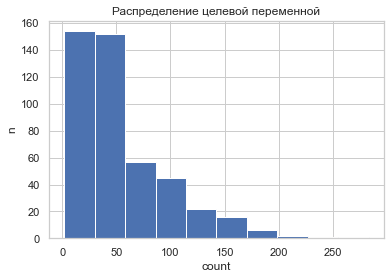

In [123]:
# код
plt.hist(data['count'])
plt.xlabel('count')
plt.ylabel('n')
plt.title('Распределение целевой переменной')